In [1]:
import torch
from torch import nn
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
mnist_trainset = datasets.MNIST(root='./data', train = True, download = True, transform = transform)
mnist_testset = datasets.MNIST(root='./data', train = False, download = True, transform = transform)

In [3]:
mnist_trainset[0][1]

5

In [4]:
trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=True)

In [5]:
# определяем гиперпараметры сети и процесса обучения
inputs, n_hidden0, n_hidden1, out = 784, 128, 64, 10 
n_epochs = 500

In [6]:
# определяем нейросеть
model = nn.Sequential(nn.Linear(inputs, n_hidden0, bias=True),nn.ReLU(),
                      nn.Linear(n_hidden0, n_hidden1, bias=True),nn.ReLU(),
                      nn.Linear(n_hidden1, out, bias=True)
) 
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)


In [7]:
# определяем функцию ошибки
criterion = nn.CrossEntropyLoss() 

In [8]:
# определяем оптимизатор - реализацию численного алгоритма оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
vec_loss = []

In [9]:
#обучаем модель
for epoch in range(n_epochs): 
    running_loss = 0
    for images, labels in trainloader:
        
        images = images.view(images.shape[0], -1)
        y_pred = model(images) 
        loss = criterion(y_pred, labels)
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(epoch, running_loss/len(trainloader)))
        vec_loss.append(running_loss/len(trainloader))

Epoch 0 - Training loss: 0.3771170194405737
Epoch 1 - Training loss: 0.13384375396643333
Epoch 2 - Training loss: 0.093007630994742
Epoch 3 - Training loss: 0.0711449901439321
Epoch 4 - Training loss: 0.05829745617611751
Epoch 5 - Training loss: 0.04630432663701856
Epoch 6 - Training loss: 0.0381225755286546
Epoch 7 - Training loss: 0.030728414479239997
Epoch 8 - Training loss: 0.025965377149335455
Epoch 9 - Training loss: 0.021606438867894234
Epoch 10 - Training loss: 0.01769160694386964
Epoch 11 - Training loss: 0.014223795064042003
Epoch 12 - Training loss: 0.01003774450242972
Epoch 13 - Training loss: 0.00786795428003451
Epoch 14 - Training loss: 0.006218939734697178
Epoch 15 - Training loss: 0.004051118692621803
Epoch 16 - Training loss: 0.00265518261138782
Epoch 17 - Training loss: 0.0017308918593016158
Epoch 18 - Training loss: 0.00114580494169662
Epoch 19 - Training loss: 0.0008993410635571163
Epoch 20 - Training loss: 0.0007657991762569699
Epoch 21 - Training loss: 0.000656584

Text(0.5, 0, 'epoch')

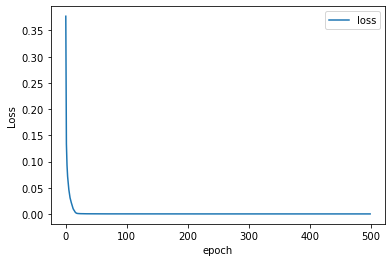

In [10]:
plt.plot(vec_loss[:], label = 'loss')
plt.legend()
plt.ylabel("Loss")
plt.xlabel("epoch")